# Replication Results - Final Analysis
- 1. Try to randomly pick 100 multi-word phrases whose scores are greater than 0.5. Manually check them and see what's the percentage of high-quality phrases.
- 2. Since these 100 multi-word phrases can be ranked by their scores, please plot a precision-recall curve too.
- 3. Try to run the word2vec code on the phrasal segmentation results to obtain phrase embedding. 
- 4. Pick 3 high-quality phrases from your previous annotations in step 1, run a similarity search among all multi-word phrases whose scores are greater than 0.5, and report the top-5 results. Comment on the results. 



In [1]:
from os import listdir
import pandas as pd
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


In [2]:
file_dir = '../data/out/'

In [3]:
phrases = []
scores = []
for f in listdir(file_dir):
    if 'multi-words' in f:
        multi_words = open(file_dir + f, 'r')
        for line in multi_words:
            line_txt = line.split()
            score = line_txt[0]
            scores.append(float(score))
            phrase = ' '.join(line_txt[1:])
            phrases.append(phrase)
        break
all_scores = pd.DataFrame({'phrase': phrases, 'score': scores})

FileNotFoundError: [Errno 2] No such file or directory: '../data/out/'

- **1. Randomly draw 100 phrases and check quality**

In [ ]:
selected_phrases = all_scores.query('score > 0.5').sample(100, random_state = 42).sort_values(by = 'score', ascending = False)\
    .reset_index(drop = True)
selected_phrases.head()

In [4]:
selected_phrases.to_csv('sample_scores.csv', index = False)

NameError: name 'selected_phrases' is not defined

- **2. precision-recall curve**

In [5]:
selected_phrases = pd.read_csv('sample_scores.csv')
selected_phrases.head()

,phrase,score,quality
0,theorem provers,0.969304,1
1,dos attack,0.951405,1
2,graphics hardware,0.949033,1
3,kluwer academic publishers,0.938439,1
4,mobile computing,0.938414,1


In [6]:
y_true = selected_phrases.quality.values
y_scores = selected_phrases.score.values
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
# precision, recall, thresholds

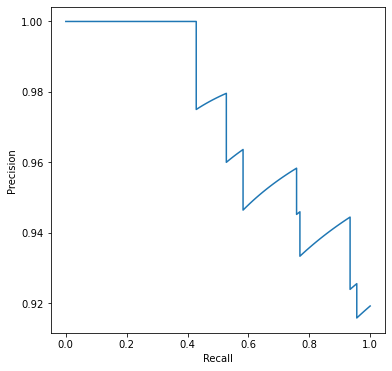

In [41]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Logistic Regression')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision');

- **3. Segmentation result & word2vec**